#### 1.Import libraries that you required and Load the data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


## Reading a csv file by giving custom column names

In [2]:
df = pd.read_csv("Zomoto.CSV", names=["rest_id", "url", "address", "rest_name", "online_order", "Table Booking Availability", "Ratings out of 5", "Voters Count", "Phone No",
                         "location", "Rest_type", "Dish Varieties", "Cuisines", "Average Cost for two", "Detail Reviews", "Menu item", "Listed type in ZOMOTO", "Listed City in ZOMOTO"])


### Since we gave custom column names, the old column names row has to be deleted

In [3]:
df.drop(index=0, inplace=True)

In [4]:
df.head(5)

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
1,14221.0,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
2,43422.0,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
3,16032.0,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
4,51635.0,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
5,23424.0,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar


### Checking for the garbage values :

In [5]:
# Define the  pattern for detecting error values
pattern = r'[^a-zA-Z0-9@&()!,.\'\s -]'

# Use the pattern to filter out error values
df[df['rest_name'].str.contains(pattern)].head(50)


,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
103,43061.0,https://www.zomato.com/bangalore/caf%C3%A9-mor...,"Le Parc Richmonde Building, Shantala nagar, Ri...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...,Yes,No,4.1 /5,118,080 43021963\n+91 7021430262,Richmond Road,Cafe,"Coffee, Pizza, Pasta, Burgers, Tomato Soup, Eg...","BBQ, Continental, Burger, Wraps, Pizza, Cafe",700,"[('Rated 3.0', 'RATED\n Ã\x83Ã\x83Ã\x82Ã\...","['Cafe Morish Veggie Pizza', 'Meat Cravers Piz...",Desserts,MG Road
266,17166.0,https://www.zomato.com/bangalore/l-81-cafe-hsr...,"Sector 6, HSR Layout, HSR",#L-81 Cafe,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,HSR
273,24260.0,https://www.zomato.com/bangalore/draggers-caf%...,"527, 4th Floor, 4th Cross, CMR Road, 2nd Block...",Draggers CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,Yes,No,4.1/5,274,+91 9632027110\r\n+91 9741385757,Kalyan Nagar,Cafe,"Club Sandwich, Burgers, Basil Chicken, Pasta, ...","Cafe, Continental, North Indian",900,"[('Rated 4.0', 'RATED\n This was a accidental...","['Onion Rings', 'Drums of Heaven', 'Sesame Hot...",Delivery,Kalyan Nagar
334,32221.0,https://www.zomato.com/bangalore/caf%C3%A9-s-k...,"752, 1st Floor, 80 Feet Road, Koramangala 4th ...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© S,No,No,3.2 /5,4,+91 8030752750\r\n080 25523350,Koramangala 4th Block,Cafe,NaN,"Cafe, American, European",600,"[('Rated 3.0', 'RATED\n We ordered. I hv neve...",[],Cafes,Koramangala 6th Block
383,19330.0,https://www.zomato.com/bangalore/1131-bar-kitc...,"100 Feet Road, HAL 2nd Stage, Indiranagar, Ban...",1131 Bar + Kitchen,No,Yes,4.6/5,2785,080 49652166,Indiranagar,"Bar, Casual Dining","Pizza, Chocolate Cake, Cocktails, Beer, Nachos...","Continental, Asian, Italian, North Indian","1,500","[('Rated 5.0', 'RATED\n This rooftop restaura...",[],Pubs and bars,Indiranagar
809,14776.0,https://www.zomato.com/bangalore/wafl-caf%C3%A...,"G1 Smart Avenue, 28, Residency Road, Bangalore",WAFL CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,Yes,No,4.0/5,85,+91 9740780105,Residency Road,"Dessert Parlor, Quick Bites","Waffles, Pie, Corn Dog","Cafe, Fast Food, Desserts, Beverages",400,"[('Rated 5.0', ""RATED\n I have ordered a few ...","['Chocolate Overloaded Hong Kong Wafl', 'Spicy...",Delivery,Frazer Town
842,14776.0,https://www.zomato.com/bangalore/wafl-caf%C3%A...,"G1 Smart Avenue, 28, Residency Road, Bangalore",WAFL CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,Yes,No,4.0/5,85,+91 9740780105,Residency Road,"Dessert Parlor, Quick Bites","Waffles, Pie, Corn Dog","Cafe, Fast Food, Desserts, Beverages",400,"[('Rated 5.0', ""RATED\n I have ordered a few ...","['Chocolate Overloaded Hong Kong Wafl', 'Spicy...",Delivery,Frazer Town
881,885.0,https://www.zomato.com/bangalore/refuel-banner...,"7, Ground Floor, RR Commercial Complex, Akshay...",#refuel,Yes,No,3.7/5,37,+91 8971227222,Bannerghatta Road,Cafe,"Thick Shakes, Sandwiches, Pasta, Mocktails","Cafe, Beverages",400,"[('Rated 3.0', 'RATED\n We ordered for Schezw...","['Kit Kat Thick Shake', 'Ferrero Rocher Thick ...",Cafes,Bannerghatta Road
1082,1256.0,https://www.zomato.com/bangalore/24-7-food-ser...,"21/22, Saifee Apartment, 5th Cross, 22nd Main ...",24/7 Food Service,Yes,No,3.0/5,7,+91 7795513215\r\r\n+91 9945052352,JP Nagar,"Takeaway, Delivery",NaN,"South Indian, North Indian, Fast Food",300,"[('Rated 1.0', 'RATED\n I don?t recommend thi...","['Murg Tikka Bowl', 'Chicken Fry', 'Phulka', '...",Delivery,Bannerghatta Road
1138,42260.0,https://www.zomato.com/bangalore/moto-store-ca...,"9, Lake Square, Tank Road, Ulsoor, Bangalore",Moto Store & CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,Yes,No,4.2 /5,383,080 49653126,Ulsoor,Cafe,"Wedges, Maggi, Burgers, Waffles, Margherita Pi...","Pizza, Italian, Cafe, Burger, Fin

### Checking the shape of data, we can see it has 10000 rows and 18 columns

In [6]:
df.shape  # no. of rows and columns

(10000, 18)

### Checking the datatype of the attributes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rest_id                     10000 non-null  float64
 1   url                         10000 non-null  object 
 2   address                     10000 non-null  object 
 3   rest_name                   10000 non-null  object 
 4   online_order                10000 non-null  object 
 5   Table Booking Availability  10000 non-null  object 
 6   Ratings out of 5            8528 non-null   object 
 7   Voters Count                10000 non-null  object 
 8   Phone No                    9764 non-null   object 
 9   location                    9997 non-null   object 
 10  Rest_type                   9953 non-null   object 
 11  Dish Varieties              4642 non-null   object 
 12  Cuisines                    9995 non-null   object 
 13  Average Cost for two        994

### Checking Column 'Ratings out of 5' 

In [8]:
df['Ratings out of 5'] = df['Ratings out of 5'].str.split('/').str[0]


In [9]:
df.head()

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
1,14221.0,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
2,43422.0,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
3,16032.0,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
4,51635.0,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
5,23424.0,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar


### Numeric Value columns had the datatype as object, we need to convert it into the numeric format, and the non numeric values must be converted into null values 

In [10]:
df['Ratings out of 5'] = pd.to_numeric(df['Ratings out of 5'], errors="coerce")
df['Voters Count'] = pd.to_numeric(df['Voters Count'], errors="coerce")
df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors="coerce")

In [11]:
df.head(5)

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
1,14221.0,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500.0,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
2,43422.0,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,NaN,"[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
3,16032.0,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600.0,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
4,51635.0,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400.0,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
5,23424.0,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NaN,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400.0,[],[],Dine-out,JP Nagar


### Checking the datatype to verify that numeric column got converted from object to numeric

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rest_id                     10000 non-null  float64
 1   url                         10000 non-null  object 
 2   address                     10000 non-null  object 
 3   rest_name                   10000 non-null  object 
 4   online_order                10000 non-null  object 
 5   Table Booking Availability  10000 non-null  object 
 6   Ratings out of 5            8118 non-null   float64
 7   Voters Count                10000 non-null  int64  
 8   Phone No                    9764 non-null   object 
 9   location                    9997 non-null   object 
 10  Rest_type                   9953 non-null   object 
 11  Dish Varieties              4642 non-null   object 
 12  Cuisines                    9995 non-null   object 
 13  Average Cost for two        858

### Converting the id from float to integer

In [13]:
df['rest_id'] = df['rest_id'].astype('Int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rest_id                     10000 non-null  Int64  
 1   url                         10000 non-null  object 
 2   address                     10000 non-null  object 
 3   rest_name                   10000 non-null  object 
 4   online_order                10000 non-null  object 
 5   Table Booking Availability  10000 non-null  object 
 6   Ratings out of 5            8118 non-null   float64
 7   Voters Count                10000 non-null  int64  
 8   Phone No                    9764 non-null   object 
 9   location                    9997 non-null   object 
 10  Rest_type                   9953 non-null   object 
 11  Dish Varieties              4642 non-null   object 
 12  Cuisines                    9995 non-null   object 
 13  Average Cost for two        858

### Checking for the duplicate rows in our data

In [15]:
df.shape  ## Verifying the shape of original data

(10000, 18)

In [16]:
df[df.duplicated()].shape   ## Checking the number of duplicate rows, we can see that there is 909 duplicate rows

(909, 18)

In [17]:
df.drop_duplicates(inplace=True)  ## deleting the duplicate rows

In [18]:
df.shape   ## post deleting checking the size of rows again

(9091, 18)

In [19]:
df.head(5)

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
1,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500.0,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
2,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,NaN,"[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
3,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600.0,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
4,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400.0,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
5,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NaN,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400.0,[],[],Dine-out,JP Nagar


### Replacing Garbage Values




In [20]:
df['Menu item'].replace({'[]' : np.NaN, "" : np.NaN}, inplace=True)
df['Detail Reviews'].replace({'[]' : np.NaN, "" : np.NaN}, inplace=True)

In [21]:
df.head(5)

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
1,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500.0,"[('Rated 3.0', 'RATED\n Typical South Indian ...",NaN,Dine-out,Electronic City
2,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,NaN,"[('Rated 1.0', 'RATED\n Expected a good night...",NaN,Dine-out,MG Road
3,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600.0,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",NaN,Delivery,HSR
4,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400.0,"[('Rated 5.0', 'RATED\n Its Looking delicious...",NaN,Dine-out,Whitefield
5,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NaN,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400.0,NaN,NaN,Dine-out,JP Nagar


### Removing blank spaces from lead and trail for column "Restaurant Name"

In [22]:
df['rest_name'] = df['rest_name'].str.strip()

### Checking for some more garbage values in the rest_name column

In [23]:
df[df['rest_name'].str.startswith("Caf")].loc[:, ['rest_id','rest_name']].head(15)

,rest_id,rest_name
9,29058,Cafe 58
98,48351,Cafe @ Elanza
103,43061,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...
132,17608,Cafe Coffee Day
159,34860,Cafe 221B
201,15457,Cafe Iftar
240,49891,Cafe Jezve
304,10992,Caffe Pascucci
334,32221,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© S
338,33536,Cafe Remix


## Removing the garbage values 

In [24]:

# Function to clean the rest_name column
def clean_restaurant_name(name):
    cleaned_name = re.sub('[^A-Za-z0-9.!`&~@\'\s -]', '', name)    
    return cleaned_name.strip()

# Clean the rest_name column
df['rest_name'] = df['rest_name'].apply(clean_restaurant_name)

In [25]:
df[df['rest_name'].str.startswith("Caf")].loc[:, ['rest_id','rest_name']].head(15)

,rest_id,rest_name
9,29058,Cafe 58
98,48351,Cafe @ Elanza
103,43061,Caf Mor'ish
132,17608,Cafe Coffee Day
159,34860,Cafe 221B
201,15457,Cafe Iftar
240,49891,Cafe Jezve
304,10992,Caffe Pascucci
334,32221,Caf S
338,33536,Cafe Remix


In [26]:

df['rest_name'] = df['rest_name'].str.replace(r'\bCaf\b', 'Cafe')


C:\Users\Nidhi Sinha\AppData\Local\Temp\ipykernel_11940\4124086315.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['rest_name'] = df['rest_name'].str.replace(r'\bCaf\b', 'Cafe')


### Using above code we replaced the CAF as CAFE

In [27]:
df[df['rest_name'].str.startswith("Caf")].loc[:, ['rest_id','rest_name']].head(15)

,rest_id,rest_name
9,29058,Cafe 58
98,48351,Cafe @ Elanza
103,43061,Cafe Mor'ish
132,17608,Cafe Coffee Day
159,34860,Cafe 221B
201,15457,Cafe Iftar
240,49891,Cafe Jezve
304,10992,Caffe Pascucci
334,32221,Cafe S
338,33536,Cafe Remix


## Checking for Other missing values in non numeric columns

In [28]:
df[df['location'].isnull()]

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
3254,32131,https://www.zomato.com/bangalore/abs-absolute-...,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buffet,Koramangala 6th Block
3763,47134,https://www.zomato.com/bangalore/the-cinema-vi...,"9, Magadi Main Road, Cholourpalya, Vijay Nagar",The Cinema,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dine-out,Rajajinagar
9160,26432,https://www.zomato.com/bangalore/new-taj-birya...,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",New Taj Biryani Centre,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dine-out,Kammanahalli


###  some missing values in column "location", we replaced it with city names listed in zomoto 

In [29]:
missing_ids = df[df['location'].isnull()].loc[:, "rest_id"]
missing_ids = missing_ids.tolist()

for rest_id in missing_ids:
    df.loc[df['rest_id'] == rest_id, 'location'] = df.loc[df['rest_id'] == rest_id, 'Listed City in ZOMOTO']

In [30]:
df[df['rest_id'].isin(missing_ids)]

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
3254,32131,https://www.zomato.com/bangalore/abs-absolute-...,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,NaN,0,NaN,Koramangala 6th Block,NaN,NaN,NaN,NaN,NaN,NaN,Buffet,Koramangala 6th Block
3763,47134,https://www.zomato.com/bangalore/the-cinema-vi...,"9, Magadi Main Road, Cholourpalya, Vijay Nagar",The Cinema,No,No,NaN,0,NaN,Rajajinagar,NaN,NaN,NaN,NaN,NaN,NaN,Dine-out,Rajajinagar
9160,26432,https://www.zomato.com/bangalore/new-taj-birya...,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",New Taj Biryani Centre,No,No,NaN,0,NaN,Kammanahalli,NaN,NaN,NaN,NaN,NaN,NaN,Dine-out,Kammanahalli


### Checking Null Values in Address Column

In [31]:
df['address'].isnull().sum()

0

In [32]:
df['Ratings out of 5'].isnull().sum()


1723

In [33]:
df['Average Cost for two'].isnull().sum()

1275

In [34]:
df['Voters Count'].isnull().sum()

0

### Replacing values for "Ratings out of 5" 

In [35]:
mean_values_ratings = df.groupby('rest_name')['Ratings out of 5'].transform('mean')

df['Ratings out of 5'].fillna(mean_values_ratings, inplace=True)

In [36]:
df['Ratings out of 5'].fillna(df['Ratings out of 5'].median(), inplace=True)

In [37]:
df['Ratings out of 5'].isnull().sum()

0

In [38]:
mean_values = df.groupby('rest_name')['Average Cost for two'].transform('mean')

df['Average Cost for two'].fillna(mean_values, inplace=True)

df

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
1,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500.0,"[('Rated 3.0', 'RATED\n Typical South Indian ...",NaN,Dine-out,Electronic City
2,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,NaN,"[('Rated 1.0', 'RATED\n Expected a good night...",NaN,Dine-out,MG Road
3,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600.0,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",NaN,Delivery,HSR
4,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400.0,"[('Rated 5.0', 'RATED\n Its Looking delicious...",NaN,Dine-out,Whitefield
5,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,3.7,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400.0,NaN,NaN,Dine-out,JP Nagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,47608,https://www.zomato.com/bangalore/caf%C3%A9-mor...,"Le Parc Richmonde Building, Shantala nagar, Ri...",Cafe Mor'ish,Yes,No,4.1,119,080 43021963\n+91 7021430262,Richmond Road,Cafe,"Coffee, Pizza, Pasta, Burgers, Tomato Soup, Eg...","BBQ, Continental, Burger, Wraps, Pizza, Cafe",700.0,"[('Rated 3.0', 'RATED\n Ã\x83Ã\x83Ã\x82Ã\...","['Cafe Morish Veggie Pizza', 'Meat Cravers Piz...",Delivery,Residency Road
9995,7255,https://www.zomato.com/bangalore/caf%C3%A9-del...,"2, Purva Riviera Shopping Complex, Marathahall...",Cafe Delight,No,No,3.2,40,080 41114222\r\n+91 9880247269,Marathahalli,"Cafe, Quick Bites",NaN,"Cafe, Italian",400.0,"[('Rated 2.0', ""RATED\n So I ordered the egg ...",NaN,Delivery,Brookefield
9998,41541,https://www.zomato.com/bangalore/tbc-sky-loung...,"36/1, 5th Floor, Berry's Hotel Kadubeesanahall...",TBC- Sky Lounge,No,Yes,4.4,619,080 42106712\n+91 7624959444,Marathahalli,"Casual Dining, Bar","Fish, Peri Peri Chicken, Cocktails, Chilli Chi...","Continental, Asian, Italian, North Indian",NaN,"[('Rated 2.0', 'RATED\n The high rating on Zo...",NaN,Dine-out,Marathahalli
9999,35621,https://www.zomato.com/bangalore/tawa-sagara-j...,"29/1, 30th Cross, 4th T Block, Thilknagar, Jay...",Tawa Sagara,No,No,3.8,122,NaN,Jayanagar,Casual Dining,"Sea Food, Biryani, Fish Thali, Neer Dosa, Murg...","Mangalorean, Seafood",700.0,"[('Rated 1.0', 'RATED\n We orders chicken suk...",NaN,Delivery,Koramangala 7th Block


In [39]:
df['Average Cost for two'].fillna(df['Average Cost for two'].median(), inplace=True)

In [40]:
df

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
1,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500.0,"[('Rated 3.0', 'RATED\n Typical South Indian ...",NaN,Dine-out,Electronic City
2,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,400.0,"[('Rated 1.0', 'RATED\n Expected a good night...",NaN,Dine-out,MG Road
3,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600.0,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",NaN,Delivery,HSR
4,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400.0,"[('Rated 5.0', 'RATED\n Its Looking delicious...",NaN,Dine-out,Whitefield
5,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,3.7,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400.0,NaN,NaN,Dine-out,JP Nagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,47608,https://www.zomato.com/bangalore/caf%C3%A9-mor...,"Le Parc Richmonde Building, Shantala nagar, Ri...",Cafe Mor'ish,Yes,No,4.1,119,080 43021963\n+91 7021430262,Richmond Road,Cafe,"Coffee, Pizza, Pasta, Burgers, Tomato Soup, Eg...","BBQ, Continental, Burger, Wraps, Pizza, Cafe",700.0,"[('Rated 3.0', 'RATED\n Ã\x83Ã\x83Ã\x82Ã\...","['Cafe Morish Veggie Pizza', 'Meat Cravers Piz...",Delivery,Residency Road
9995,7255,https://www.zomato.com/bangalore/caf%C3%A9-del...,"2, Purva Riviera Shopping Complex, Marathahall...",Cafe Delight,No,No,3.2,40,080 41114222\r\n+91 9880247269,Marathahalli,"Cafe, Quick Bites",NaN,"Cafe, Italian",400.0,"[('Rated 2.0', ""RATED\n So I ordered the egg ...",NaN,Delivery,Brookefield
9998,41541,https://www.zomato.com/bangalore/tbc-sky-loung...,"36/1, 5th Floor, Berry's Hotel Kadubeesanahall...",TBC- Sky Lounge,No,Yes,4.4,619,080 42106712\n+91 7624959444,Marathahalli,"Casual Dining, Bar","Fish, Peri Peri Chicken, Cocktails, Chilli Chi...","Continental, Asian, Italian, North Indian",400.0,"[('Rated 2.0', 'RATED\n The high rating on Zo...",NaN,Dine-out,Marathahalli
9999,35621,https://www.zomato.com/bangalore/tawa-sagara-j...,"29/1, 30th Cross, 4th T Block, Thilknagar, Jay...",Tawa Sagara,No,No,3.8,122,NaN,Jayanagar,Casual Dining,"Sea Food, Biryani, Fish Thali, Neer Dosa, Murg...","Mangalorean, Seafood",700.0,"[('Rated 1.0', 'RATED\n We orders chicken suk...",NaN,Delivery,Koramangala 7th Block


In [41]:
df['Average Cost for two'].isnull().sum()

0

In [42]:
df["Rest_type"].isnull().sum()

44

In [43]:
df["rest_name"]

1               Shree Ranga Vilas
2          Sphyre - Gateway Hotel
3                  Popular Bakery
4        Thai & Chinese Fast Food
5                 Grill On Wheels
                   ...           
9994                 Cafe Mor'ish
9995                 Cafe Delight
9998              TBC- Sky Lounge
9999                  Tawa Sagara
10000           A3 Nuwang Kitchen
Name: rest_name, Length: 9091, dtype: object

In [44]:
df['Rest_type'] = df.groupby('rest_name')['Rest_type'].fillna(method='ffill')

In [45]:
df["Rest_type"].isnull().sum()

35

### Questions

#### 2.	Which are the top restaurant chains based on the distribution(frequency) in Bangaluru?

In [46]:
grouped_df = df.groupby(by=['rest_name']).agg({ 'Ratings out of 5': 'mean', 'Voters Count': 'sum'})
grouped_df

grouped_df['Number of restaurants'] = df['rest_name'].value_counts()
grouped_df


,Ratings out of 5,Voters Count,Number of restaurants
rest_name,,,
100C,3.700000,41,1
1131 Bar Kitchen,4.533333,8431,3
12th Main - Grand Mercure,4.100000,708,2
1441 Pizzeria,4.100000,287,2
1522 - The Pub,4.266667,3681,3
...,...,...,...
i-Bar - The Park Bangalore,3.800000,3718,6
iSpice Resto Cafe,3.700000,28,1
nu.tree,4.333333,748,3


In [47]:
grouped_df.sort_values(by=["Voters Count","Ratings out of 5"],ascending=False).head(10)

,Ratings out of 5,Voters Count,Number of restaurants
rest_name,,,
Onesta,4.426667,64814,15
Truffles,4.580000,59814,10
Hammered,4.612500,34320,10
Arbor Brewing Company,4.500000,33583,4
Prost Brew Pub,4.500000,31435,4
The Black Pearl,4.733333,27916,3
Empire Restaurant,4.066667,25562,9
The Biere Club,4.300000,24456,7
Barbeque Nation,4.666667,22965,6


In [48]:
grouped_df.sort_values("Number of restaurants",ascending=False).head(10)

,Ratings out of 5,Voters Count,Number of restaurants
rest_name,,,
Cafe Coffee Day,3.364286,676,17
Baskin Robbins,3.581250,728,16
McDonald's,3.556250,3994,16
Onesta,4.426667,64814,15
Keventers,3.706667,1488,15
The Chocolate Heaven,3.580000,1038,14
KFC,3.492857,6153,14
Petoo,3.846154,881,14
Sweet Truth,3.984615,489,13


#### 3. How many restaurants do not accept online orders?



In [49]:
no_online_order=df[(df['online_order']=='No')].count()

print('Number of restaurants that do not accept online orders is:',no_online_order['online_order'])

Number of restaurants that do not accept online orders is: 3668


#### 4.	What is the ratio b/w restaurants that provide and do not provide table booking?

In [50]:
table_booking_counts = df['Table Booking Availability'].value_counts()

restaurants_with_table_booking = table_booking_counts.get('Yes', 0)
restaurants_without_table_booking = table_booking_counts.get('No', 0)

ratio_provide_booking = restaurants_with_table_booking / len(df)
ratio_not_provide_booking = restaurants_without_table_booking / len(df)

print(f"Ratio of restaurants that provide table booking: {ratio_provide_booking:.2f}")
print(f"Ratio of restaurants that do not provide table booking: {ratio_not_provide_booking:.2f}")


Ratio of restaurants that provide table booking: 0.12
Ratio of restaurants that do not provide table booking: 0.88


In [51]:
table_booking_yes=df[(df['Table Booking Availability']=='Yes')].count()
yes=table_booking_yes['Table Booking Availability']
table_booking_no=df[(df['Table Booking Availability']=='No')].count()
no=table_booking_no['Table Booking Availability']
ratio_table_booking=yes/no
print('The ratio between restaurants that provide and do not provide table booking is',ratio_table_booking)

The ratio between restaurants that provide and do not provide table booking is 0.14108196309777835


#### 5.	Use a boxplot on the rating column. Use User Defined Function or Lambda function or Apply function to extract the data that comes before /. Kindly exclude /.


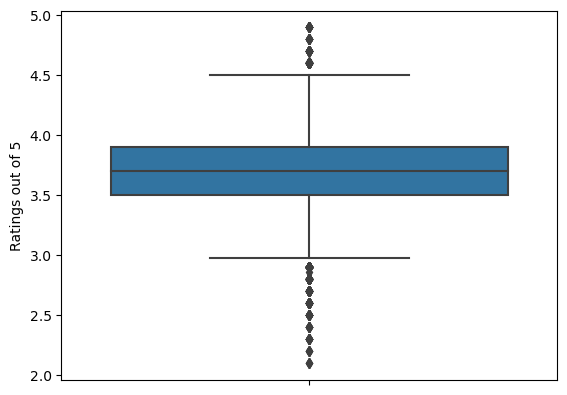

In [52]:
sns.boxplot(data=df, y='Ratings out of 5')
plt.show()

#### 6.	Online and Offline orders restaurants percentage.


In [53]:
total_restaurant = len(df)

online_orders = df['online_order'].value_counts().get('Yes', 0)

offline_orders = df['online_order'].value_counts().get('No', 0)

# Calculate the percentages
percentage_online_orders = (online_orders / total_restaurant) * 100
percentage_offline_orders = (offline_orders / total_restaurant) * 100

print(f"Percentage of restaurants offering online orders: {percentage_online_orders:.2f}%")
print(f"Percentage of restaurants offering offline orders: {percentage_offline_orders:.2f}%")


Percentage of restaurants offering online orders: 59.65%
Percentage of restaurants offering offline orders: 40.35%


#### 7.	 Plot the scatter plot using the Cost vs rating variable with respect to online order. Use apply the function Or other function to remove the “,”.


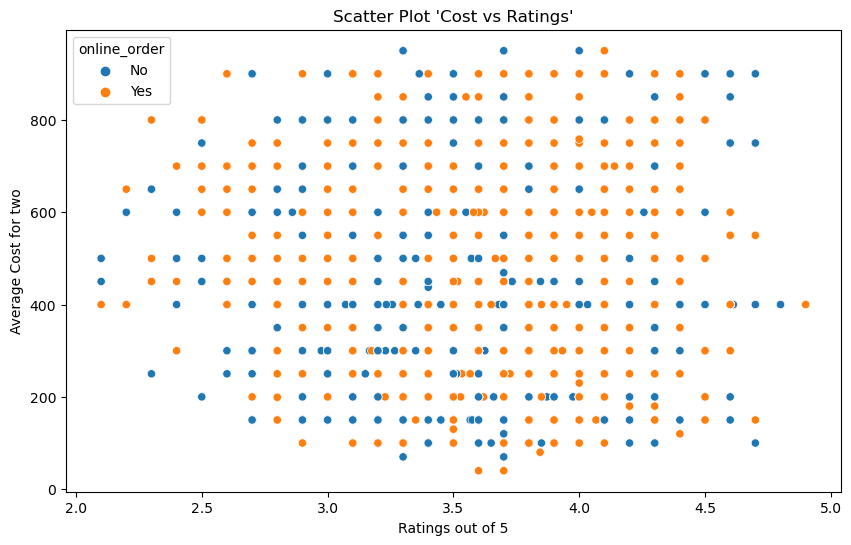

In [54]:
plt.figure(figsize=(10, 6))

sns.scatterplot(y=df['Average Cost for two'], x=df['Ratings out of 5'], hue=df['online_order'])

plt.title(label="Scatter Plot 'Cost vs Ratings'")
plt.show()

#### 8.	Find the distribution of the votes and Approx_cost using a user-defined function and for a loop.

In [55]:
def calculate_distribution(column_name):
    value_counts = df[column_name].value_counts()
    return value_counts

columns_of_interest = ['Voters Count', 'Average Cost for two']
for column in columns_of_interest:
    distribution = calculate_distribution(column)
    print(f"Distribution for '{column}':\n{distribution}\n")

Distribution for 'Voters Count':
0       1721
4        195
6        161
7        160
11       131
        ... 
3021       1
3056       1
2291       1
779        1
2133       1
Name: Voters Count, Length: 1293, dtype: int64

Distribution for 'Average Cost for two':
400.000000    2370
300.000000    1328
200.000000     852
500.000000     847
600.000000     656
250.000000     530
800.000000     389
700.000000     378
150.000000     372
350.000000     302
450.000000     276
100.000000     171
650.000000     152
550.000000     143
900.000000     139
750.000000     123
850.000000      34
950.000000      11
180.000000       3
70.000000        2
130.000000       2
758.333333       2
40.000000        2
120.000000       2
437.500000       1
230.000000       1
469.000000       1
199.000000       1
80.000000        1
Name: Average Cost for two, dtype: int64



In [56]:
def distribution(column_name):
    distribution = df[column_name].value_counts().sort_index()
    return distribution

# List of columns to analyze
columns_to_analyze = ['Voters Count', 'Average Cost for two']

# Use a for loop to find and display the distribution for each column
for column in columns_to_analyze:
    print(f"Distribution for '{column}':")
    distributions = distribution(column)
    print(distributions)
    print()

Distribution for 'Voters Count':
0        1721
1           2
2           2
4         195
5         130
         ... 
10471       1
14654       1
14690       1
14694       1
14956       1
Name: Voters Count, Length: 1293, dtype: int64

Distribution for 'Average Cost for two':
40.000000        2
70.000000        2
80.000000        1
100.000000     171
120.000000       2
130.000000       2
150.000000     372
180.000000       3
199.000000       1
200.000000     852
230.000000       1
250.000000     530
300.000000    1328
350.000000     302
400.000000    2370
437.500000       1
450.000000     276
469.000000       1
500.000000     847
550.000000     143
600.000000     656
650.000000     152
700.000000     378
750.000000     123
758.333333       2
800.000000     389
850.000000      34
900.000000     139
950.000000      11
Name: Average Cost for two, dtype: int64



#### 9.	Which are the most common restaurant type in Banglore?

In [57]:
common_restaurant_type=df['Rest_type'].value_counts().head(1)

print('The most common restaurant type in Banglore : ',common_restaurant_type)

The most common restaurant type in Banglore :  Quick Bites    3300
Name: Rest_type, dtype: int64


#### 10.	Is there any difference b/w the votes of restaurants accepting and not accepting online orders?

In [58]:
ans = df[df["online_order"] == "Yes"].loc[:, "Voters Count"].value_counts().sum(
) - df[df["online_order"] == "No"].loc[:, "Voters Count"].value_counts().sum()

print("The difference between the votes of restaurants accepting and not accepting online orders is :", ans)

The difference between the votes of restaurants accepting and not accepting online orders is : 1755


#### 11.	Which are the most common restaurant type in Banglore?


In [59]:
common_restaurant_type=df['Rest_type'].value_counts().head(1)

print('The most common restaurant type in Banglore : ',common_restaurant_type)

The most common restaurant type in Banglore :  Quick Bites    3300
Name: Rest_type, dtype: int64


#### 12.	Find the Best budget Restaurants in any location.


In [60]:
budget_rest = df[((df['Average Cost for two'] >= 400) & (df['Average Cost for two'] <= 460) & (df['Ratings out of 5'] > 4)
                  & (df['Voters Count'] > 5000))].loc[:, ['rest_name', 'Rest_type', 'location',
                                                          'Average Cost for two', 'Ratings out of 5', 'Voters Count']]

budget_rest.drop_duplicates(inplace=True)

budget_rest.groupby(by=['rest_name', 'location', 'Rest_type']).agg(
    {'Average Cost for two': 'mean', 'Ratings out of 5': 'mean', 'Voters Count': 'sum'})

,,,Average Cost for two,Ratings out of 5,Voters Count
rest_name,location,Rest_type,,,
AB's - Absolute Barbecues,BTM,Casual Dining,400.0,4.9,19317
Arbor Brewing Company,Brigade Road,"Pub, Microbrewery",400.0,4.5,25201
Barbeque Nation,Indiranagar,Casual Dining,400.0,4.7,7152
Biergarten,Whitefield,"Microbrewery, Pub",400.0,4.7,7064
Big Pitcher,Old Airport Road,"Pub, Microbrewery",400.0,4.7,9041
Church Street Social,Church Street,Lounge,400.0,4.3,7584
Fenny's Lounge And Kitchen,Koramangala 7th Block,"Bar, Casual Dining",400.0,4.5,12762
Hard Rock Cafe,St. Marks Road,"Casual Dining, Bar",400.0,4.5,15828
Hoot,Sarjapur Road,"Microbrewery, Pub",400.0,4.2,14523


#### 13.	Top quick bites restaurant chains in Banglore.


In [61]:
top_quick_bite_rest = df[(df['Rest_type'] == 'Quick Bites') & (df['Ratings out of 5'] > 4) & (
    df['Voters Count'] > 1000)].loc[:, ['rest_name', 'location', 'Average Cost for two', 'Ratings out of 5', 'Voters Count']]

top_quick_bite_rest.drop_duplicates(inplace=True)

top_quick_bite_rest.groupby(by=['rest_name', 'location']).agg(
    {'Average Cost for two': 'mean', 'Ratings out of 5': 'mean', 'Voters Count': 'sum'})

,,Average Cost for two,Ratings out of 5,Voters Count
rest_name,location,,,
CTR,Malleshwaram,150.0,4.7,4408
Eat Street,Koramangala 6th Block,600.0,4.2,3065
Kabab Magic,Basavanagudi,400.0,4.1,1720
Taco Bell,Koramangala 6th Block,600.0,4.1,3922
Veena Stores,Malleshwaram,150.0,4.5,2416


#### 14.	Which are the most popular casual dining restaurant chains, Make use of any plot related to this question?

C:\Users\Nidhi Sinha\AppData\Local\Temp\ipykernel_11940\2914707194.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['popularity'] = df2['Ratings out of 5'] * df2['Voters Count']


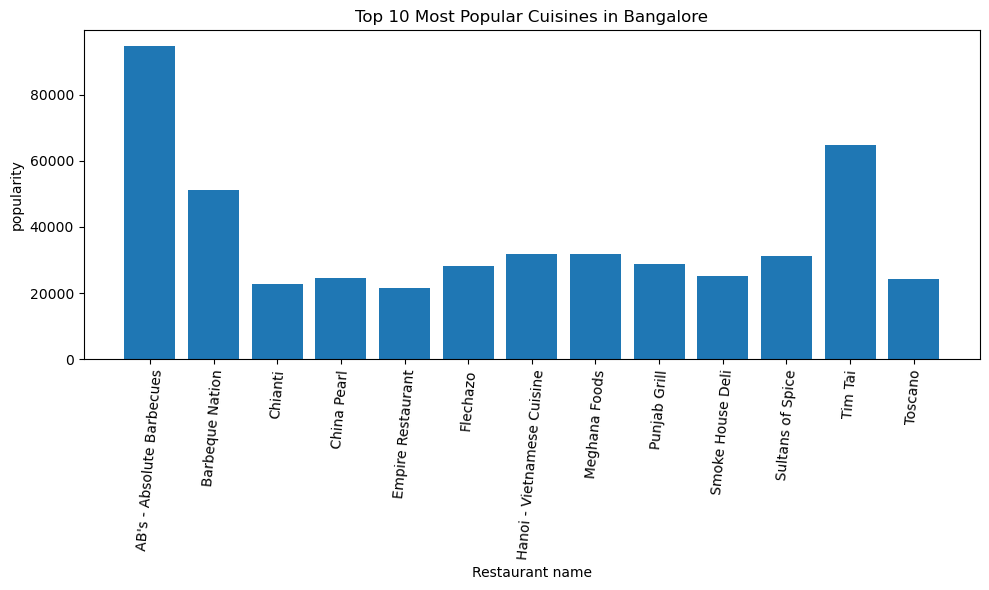

In [62]:
popular_casual_dining_rest = pd.DataFrame(df[df['Rest_type'] == 'Casual Dining'].groupby(
    by=['rest_name', 'location']).agg({'Average Cost for two': 'mean', 'Ratings out of 5': 'mean', 'Voters Count': 'sum'}))

popular_casual_dining_rest.reset_index(inplace=True)

df2 = popular_casual_dining_rest[(popular_casual_dining_rest['Ratings out of 5'] > 4.3) &
                                 (popular_casual_dining_rest['Voters Count'] > 4000)]

df2['popularity'] = df2['Ratings out of 5'] * df2['Voters Count']

df2

plt.figure(figsize=(10, 6))
plt.bar(x=df2['rest_name'],height=df2['popularity'])
plt.xlabel('Restaurant name')
plt.ylabel('popularity')
plt.title(f'Top {10} Most Popular Cuisines in Bangalore')
plt.xticks(rotation=85)
plt.tight_layout()


plt.show()





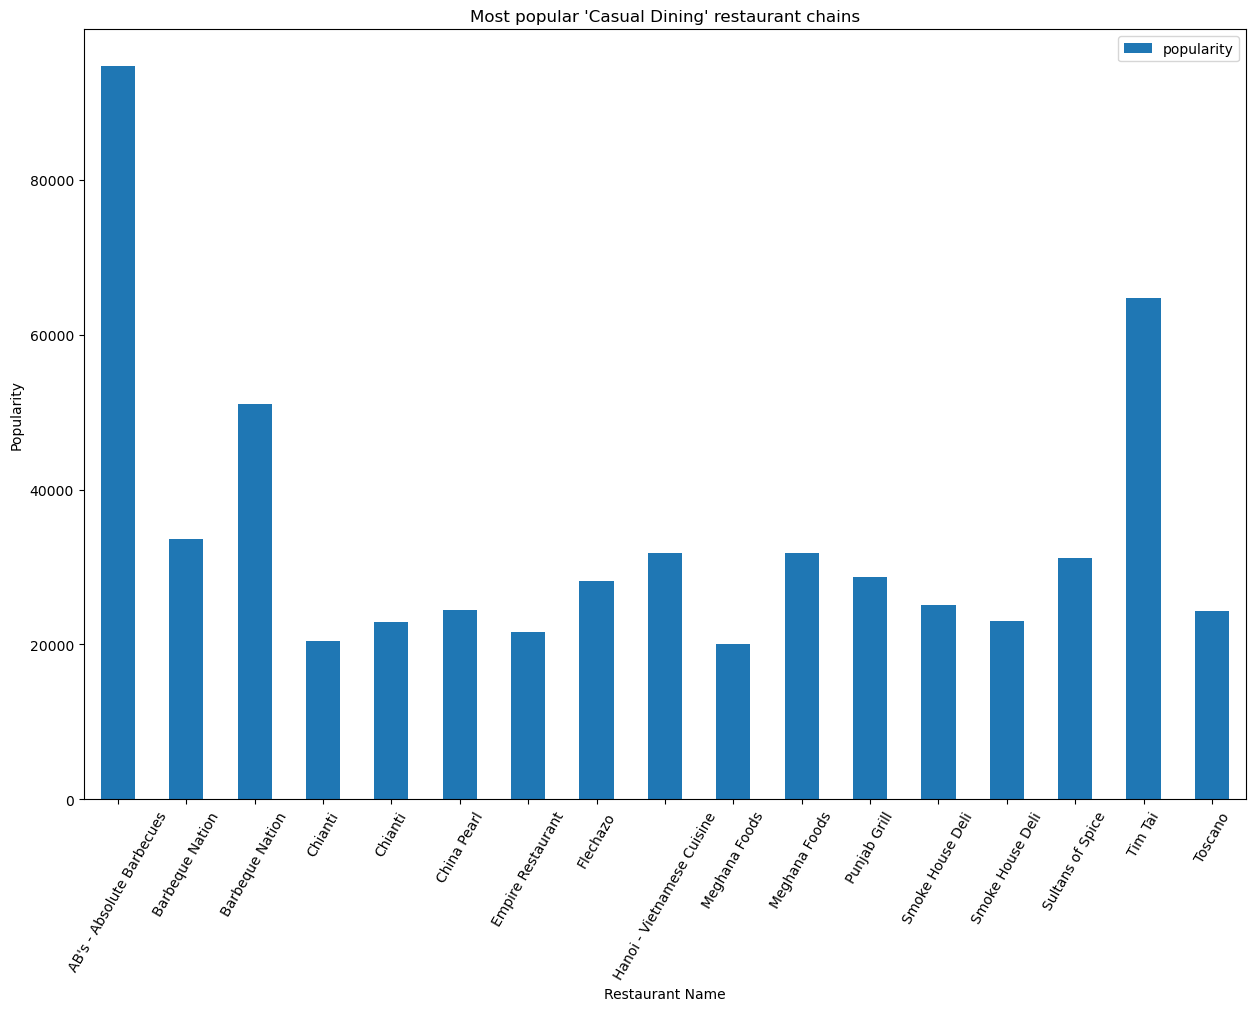

In [63]:
df2.plot(kind='bar', x='rest_name', y='popularity', xlabel="Restaurant Name",
         ylabel="Popularity", title="Most popular 'Casual Dining' restaurant chains", figsize=(15,10))

plt.xticks(rotation=60)

plt.show()

#### 15.	Which are the most popular cuisines of Bangalore using a related plot?

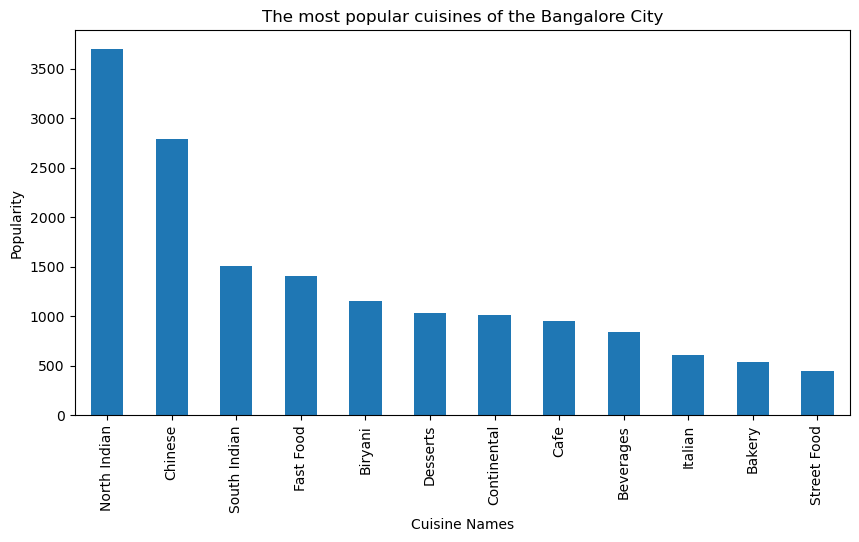

In [64]:
cuisine_list = df['Cuisines'].str.split(',\s*').explode()

total_count_cuisine = cuisine_list.value_counts()

total_count_cuisine

total_count_cuisine.sort_values(ascending=False).head(12).plot(
    kind='bar', xlabel= 'Cuisine Names',ylabel="Popularity", title="The most popular cuisines of the Bangalore City",
    figsize=(10, 5))

plt.show()